In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import pandas as pd
import bisect

In [2]:
V_GS = np.arange(2.5, 4.5, 0.5)
V_GS

array([2.5, 3. , 3.5, 4. ])

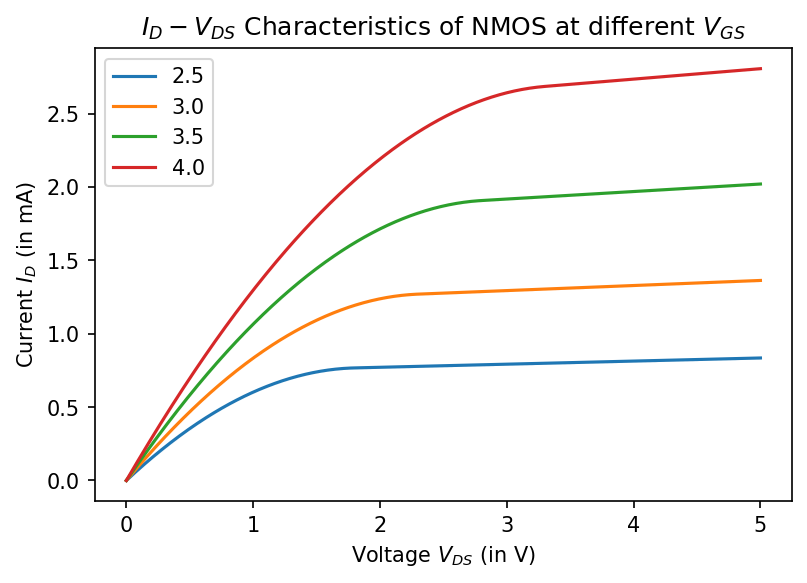

In [3]:
V_DS = []
I_D = []

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{DS}$ (in V)')
ax1.set_ylabel('Current $I_D$ (in mA)')
ax1.set_title('$I_D-V_{DS}$ Characteristics of NMOS at different $V_{GS}$')

for i in range(len(V_GS)):
    data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab6\\11' +  str(i+1) + '.txt', header = None, skipinitialspace=True, delim_whitespace=True)
    V_DS.append(data[0])
    I_D.append(data[1])
    ax1.plot(V_DS[i], 1000*I_D[i], '-o', markersize=0.01)
ax1.legend(V_GS)
fig1.set_dpi(150)
fig1.savefig('111.pdf')

In [4]:
slopes = []
for i in range(len(V_GS)):
    slope = []
    for j in range(len(V_DS[i])-1):
        slope.append((I_D[i][j+1]-I_D[i][j])/(V_DS[i][j+1]-V_DS[i][j]))
    slopes.append(slope)
# slopes[0]

In [5]:
slope_min = np.zeros(len(V_GS))
slope_max = np.zeros(len(V_GS))
for i in range(len(V_GS)):
    slope_min[i] = min(slopes[i])
    slope_max[i] = max(slopes[i])
print(slope_min)
print(slope_max)

r_DS = [1/i for i in slope_max]
print("r_DS", r_DS)
r_0= [1/i for i in slope_min]
print("r_0", r_0)

[2.1141e-05 3.4517e-05 5.1156e-05 7.1057e-05]
[0.00080798 0.00103305 0.00125811 0.00148318]
r_DS [1237.6478888513582, 968.0078253752603, 794.8400573159166, 674.2269987459377]
r_0 [47301.452154619954, 28971.231567066454, 19548.049104723166, 14073.208832355183]


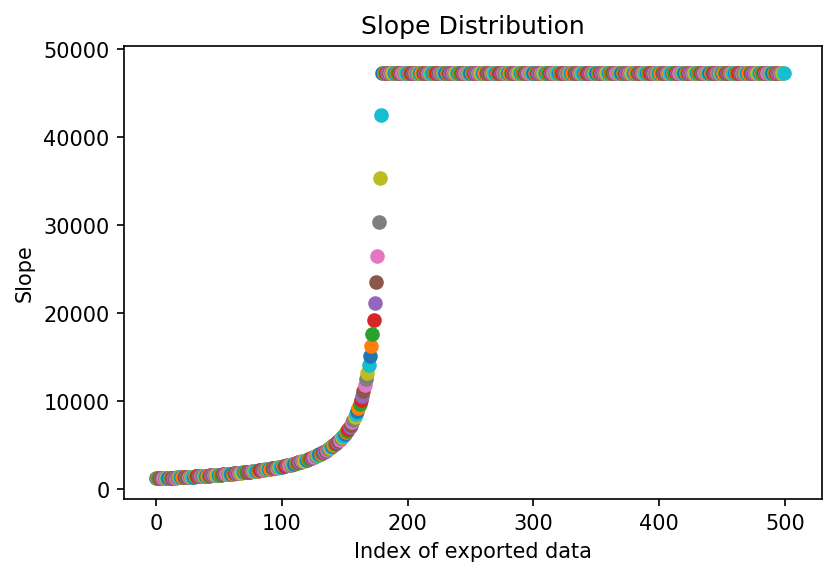

In [6]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Index of exported data')
ax1.set_ylabel('Slope')
ax1.set_title('Slope Distribution')
for i in range(len(V_DS[0])-1):
    plt.scatter(i,(V_DS[0][i+1]-V_DS[0][i])/(I_D[0][i+1]-I_D[0][i]))
fig1.set_dpi(150)
fig1.savefig('121.pdf')

In [7]:
y_intercepts = np.zeros(len(V_GS))
slope_fit = np.zeros(len(V_GS))
for i in range(len(V_GS)):
    slope, intercept, r_value, p_value, std_err = stats.linregress(V_DS[i][-2:], I_D[i][-2:])
    y_intercepts[i] = intercept
    slope_fit[i] = slope
print(slope_fit)
print(y_intercepts)

[2.1141e-05 3.4518e-05 5.1157e-05 7.1058e-05]
[0.000729   0.00119025 0.001764   0.00245025]


[-34.48275886 -34.48190104 -34.48198702 -34.48234203]
-34.48224723629818
[47301.45215462 28970.39225912 19547.66698594 14073.01077994]


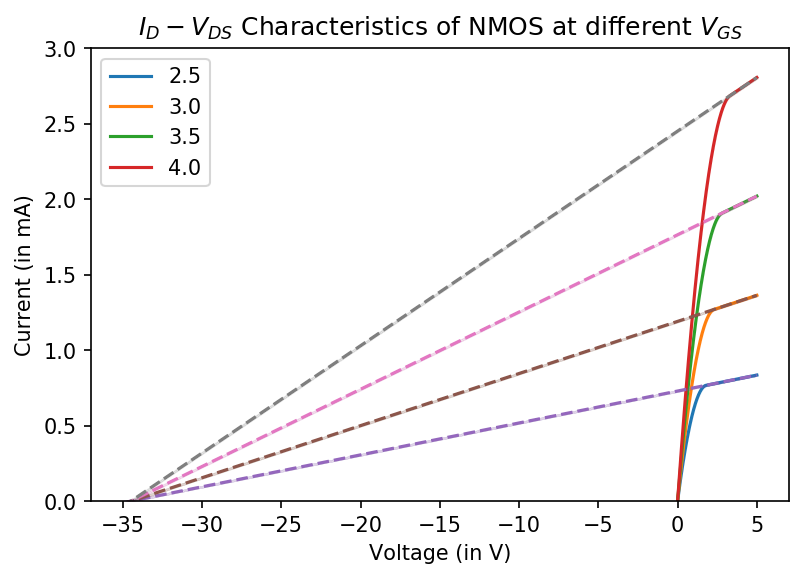

In [8]:
V_A = np.zeros(len(V_GS))
R_0 = np.zeros(len(V_GS))
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage (in V)')
ax1.set_ylabel('Current (in mA)')
ax1.set_ylim([0,3])
ax1.set_title('$I_D-V_{DS}$ Characteristics of NMOS at different $V_{GS}$')
fig1.set_dpi(150)
intersect = -35
x = np.arange(intersect,5,0.01)
for i in range(len(V_GS)):
    ax1.plot(V_DS[i], 1000*I_D[i], '-o', markersize=0.01)
for i in range(len(V_GS)):
    ax1.plot(x, 1000*(slope_fit[i]*x+y_intercepts[i]), '--o', markersize=0.01)
    V_A[i] = -y_intercepts[i]/slope_fit[i]
    R_0[i] = 1/slope_fit[i]
print(V_A)
print(np.mean(V_A))
print(R_0)
ax1.legend(V_GS)
fig1.savefig('122.pdf')

-0.0724176000000018
V_T = 0.8000000000000167
g_m = 0.09052200000000037


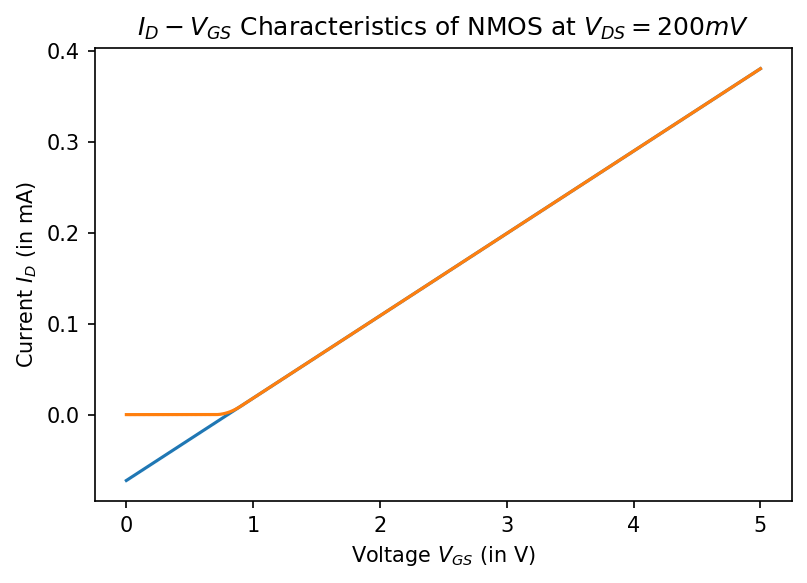

In [9]:
data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab6\\211.txt', header = None, skipinitialspace=True, delim_whitespace=True)
V_GS = data[0]
I_D = data[1]

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{GS}$ (in V)')
ax1.set_ylabel('Current $I_D$ (in mA)')
ax1.set_title('$I_D-V_{GS}$ Characteristics of NMOS at $V_{DS}=200mV$')
# ax1.legend(V_GS)
fig1.set_dpi(150)
slope, y_intercept, r_value, p_value, std_err = stats.linregress(V_GS[-2:], 1000*I_D[-2:])
ax1.plot(V_GS, slope*V_GS + y_intercept, '-o', markersize=0.01)
ax1.plot(V_GS, 1000*I_D, '-o', markersize=0.01)
print(y_intercept)
V_T = -y_intercept/slope
print("V_T =", V_T)
g_m = slope
print("g_m =", g_m)  # in m mhos
fig1.savefig('21.pdf')

V_T = 0.7000004772948576
K = 0.5152501154659527
g_m = 1.1876510000000458


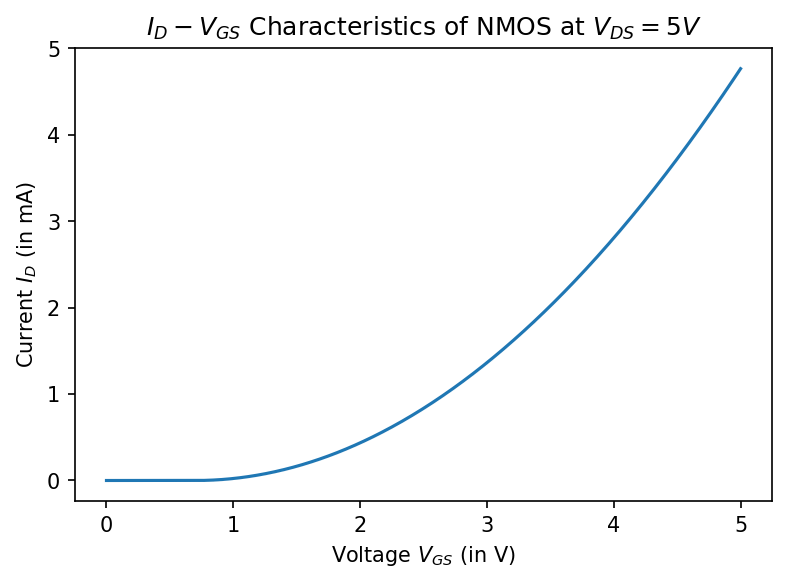

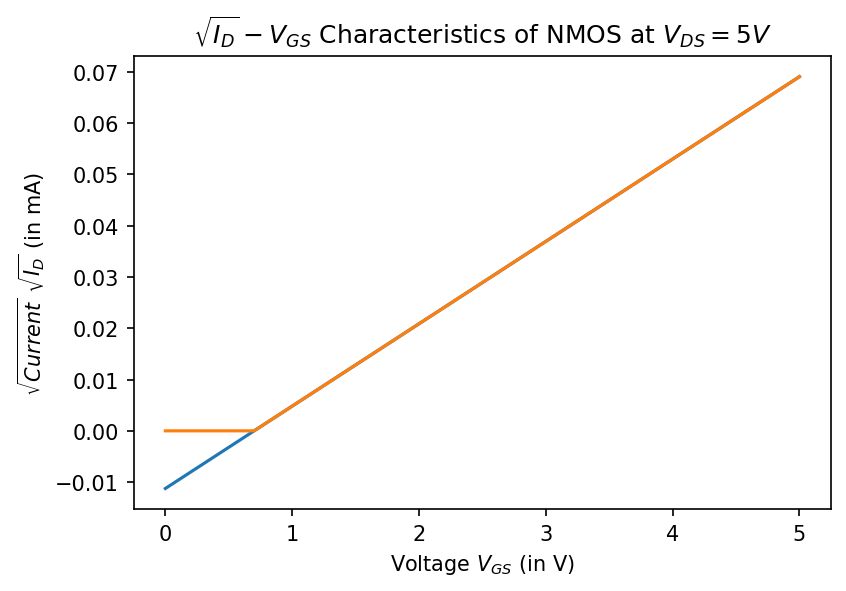

In [10]:
data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab6\\221.txt', header = None, skipinitialspace=True, delim_whitespace=True)
V_GS = data[0]
I_D = data[1]
I_D_sqrt = [math.sqrt(i) for i in I_D]
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{GS}$ (in V)')
ax1.set_ylabel('Current $I_D$ (in mA)')
ax1.set_title('$I_D-V_{GS}$ Characteristics of NMOS at $V_{DS}=5V$')
# ax1.legend(V_GS)
fig1.set_dpi(150)
ax1.plot(V_GS, 1000*I_D, '-o', markersize=0.01)

fig2, ax2 = plt.subplots()
ax2.set_xlabel('Voltage $V_{GS}$ (in V)')
ax2.set_ylabel('$\sqrt{{Current}}$ $\sqrt{I_D}$ (in mA)')
ax2.set_title('$\sqrt{I_D}-V_{GS}$ Characteristics of NMOS at $V_{DS}=5V$')
slope, y_intercept, r_value, p_value, std_err = stats.linregress(V_GS[-2:], (I_D_sqrt[-2:]))
ax2.plot(V_GS, slope*V_GS + y_intercept, '-o', markersize=0.01)
ax2.plot(V_GS, I_D_sqrt, '-o', markersize=0.01)
fig2.set_dpi(150)
V_T = -y_intercept/slope
print("V_T =", V_T)
K = 1000*2*slope**2
print("K =", K) # mA/V^2
# print(V_GS[300])
g_m = 1000*(I_D[301]-I_D[300]) / (V_GS[301]-V_GS[300])
print("g_m =", g_m)  # in m mhos
fig1.savefig('221.pdf')
fig2.savefig('222.pdf')
# fig2.legend(["Characteristics", "Extrapolation"])

In [11]:
V_SB = np.arange(0,5,1)
V_SB

array([0, 1, 2, 3, 4])

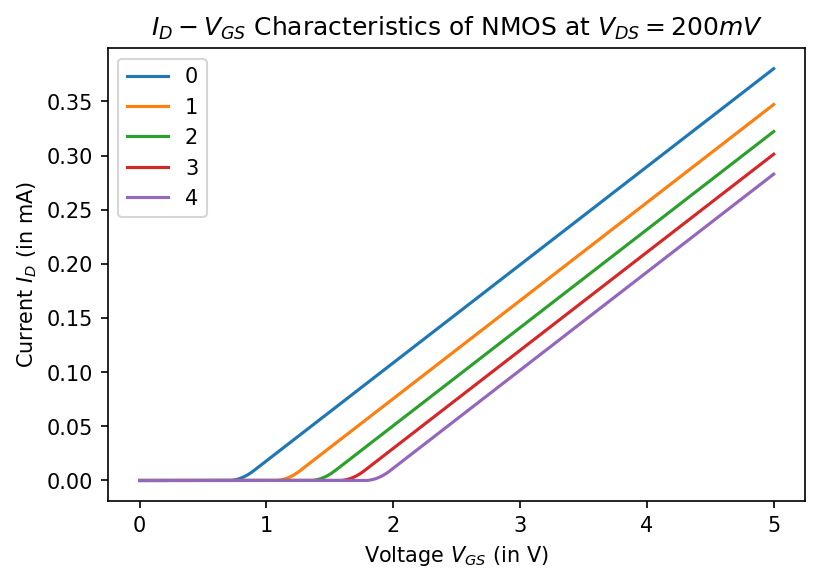

In [12]:
V_GS = []
I_D = []

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{GS}$ (in V)')
ax1.set_ylabel('Current $I_D$ (in mA)')
ax1.set_title('$I_D-V_{GS}$ Characteristics of NMOS at $V_{DS}=200mV$')

for i in range(len(V_SB)): 
    data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab6\\31' +  str(i+1) + '.txt', header = None, skipinitialspace=True, delim_whitespace=True)
    V_GS.append(data[0])
    I_D.append(data[1])
    ax1.plot(V_GS[i], 1000*I_D[i], '-o', markersize=0.01)
ax1.legend(V_SB)
fig1.set_dpi(150)
fig1.savefig('311.pdf')

In [13]:
y_intercepts = np.zeros(len(V_SB))
slope_fit = np.zeros(len(V_SB))
for i in range(len(V_SB)):
    slope, intercept, r_value, p_value, std_err = stats.linregress(V_GS[i][-2:], I_D[i][-2:])
    y_intercepts[i] = intercept
    slope_fit[i] = slope
print(slope_fit)
print(y_intercepts)

[9.0522e-05 9.0522e-05 9.0522e-05 9.0522e-05 9.0522e-05]
[-7.24176000e-05 -1.05481967e-04 -1.30452794e-04 -1.51374026e-04
 -1.69744533e-04]


[0.8        1.16526333 1.44111701 1.67223466 1.87517436]


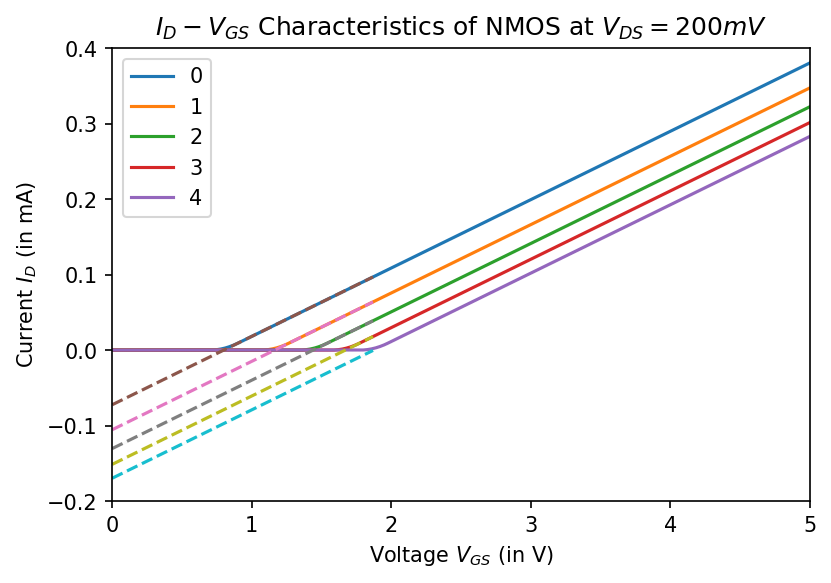

In [14]:
V_T = np.zeros(len(V_SB))
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{GS}$ (in V)')
ax1.set_xlim([0,5])
ax1.set_ylabel('Current $I_D$ (in mA)')
ax1.set_ylim([-0.2,0.4])
ax1.set_title('$I_D-V_{GS}$ Characteristics of NMOS at $V_{DS}=200mV$')
fig1.set_dpi(150)
intersect = -10
for i in range(len(V_SB)):
    x = np.arange(intersect,-y_intercepts[i]/slope_fit[i],0.01)
    ax1.plot(V_GS[i], 1000*I_D[i], '-o', markersize=0.01)
    V_T[i] = -y_intercepts[i]/slope_fit[i]
for i in range(len(V_SB)):
    ax1.plot(x, 1000*(slope_fit[i]*x+y_intercepts[i]), '--o', markersize=0.01)
print(V_T)
ax1.legend(V_SB)
fig1.savefig('312.pdf')

In [15]:
gamma = []
phi_s = 0.9
V_T0 = V_T[0]
for i in range(1,len(V_SB)):
    gamma.append((V_T[i] - V_T0)/(math.sqrt(phi_s+V_SB[i]) - math.sqrt(phi_s)))
gamma

[0.8499999712999388, 0.849999963498767, 0.8499999645172701, 0.8499999612210419]

In [16]:
gamma_avg = np.mean(gamma)
gamma_avg

0.8499999651342545

In [17]:
V_Ta = np.zeros(len(V_SB))
for i in range(len(V_SB)):
    V_Ta[i] = V_T0 + gamma_avg*(math.sqrt(phi_s+V_SB[i]) - math.sqrt(phi_s))

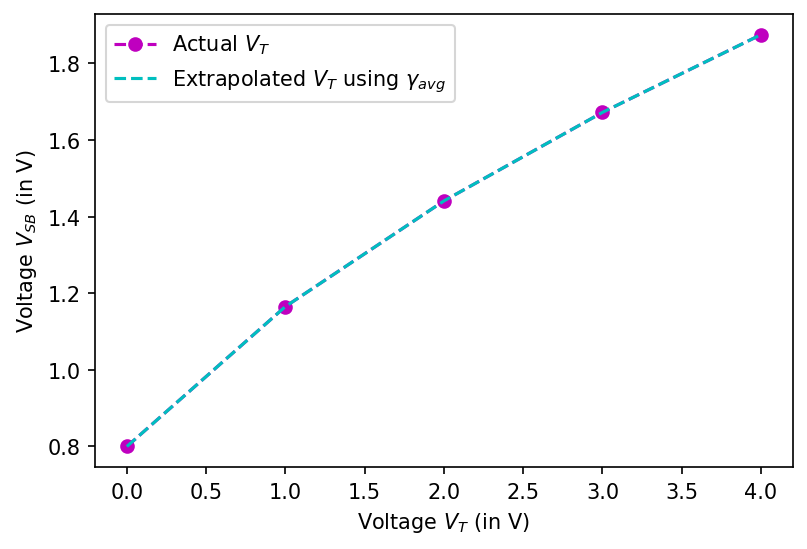

In [18]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{T}$ (in V)')
ax1.set_ylabel('Voltage $V_{SB}$ (in V)')
ax1.plot(V_SB, V_T, '--om')
ax1.plot(V_SB, V_Ta, '--c')
fig1.set_dpi(150)
plt.legend(["Actual $V_T$", "Extrapolated $V_T$ using $\gamma_{avg}$"])
fig1.savefig('32.pdf')

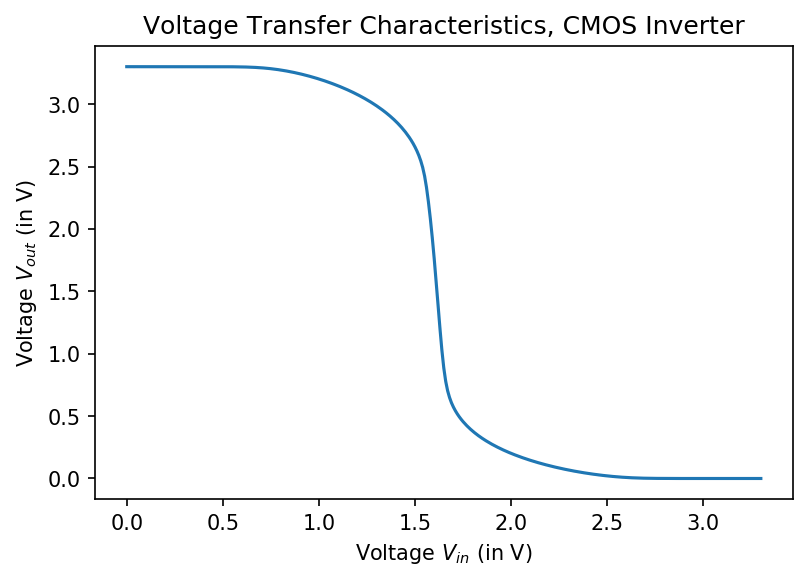

In [19]:
data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab6\\411.txt', header = None, skipinitialspace=True, delim_whitespace=True)
V_out = data[1]
V_in = data[0]

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{in}$ (in V)')
ax1.set_ylabel('Voltage $V_{out}$ (in V)')
ax1.set_title('Voltage Transfer Characteristics, CMOS Inverter')
# ax1.legend(V_GS)
fig1.set_dpi(150)
ax1.plot(V_in, V_out, '-o', markersize=0.01)
fig1.savefig('411.pdf')

161
1.61


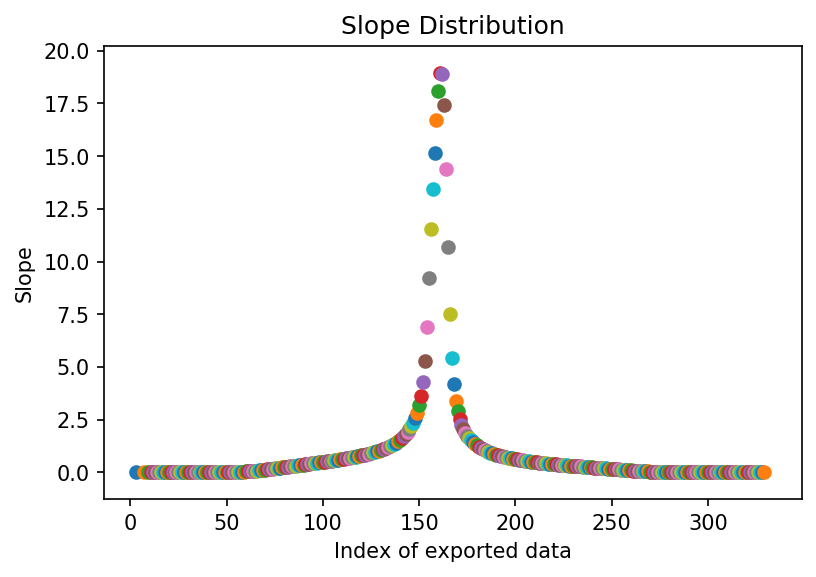

In [20]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Index of exported data')
ax1.set_ylabel('Slope')
ax1.set_title('Slope Distribution')

maxi = 0
maxe = 0

for i in range(len(V_in)-1):
    if V_out[i+1] != V_out[i]:
        slope = abs((V_out[i+1]-V_out[i])/(V_in[i+1]-V_in[i]))
        if (maxe < slope):
            maxe = slope
            maxi = i
        plt.scatter(i,slope)
fig1.set_dpi(150)
fig1.savefig('412.pdf')
print(maxi)
print(V_in[maxi])

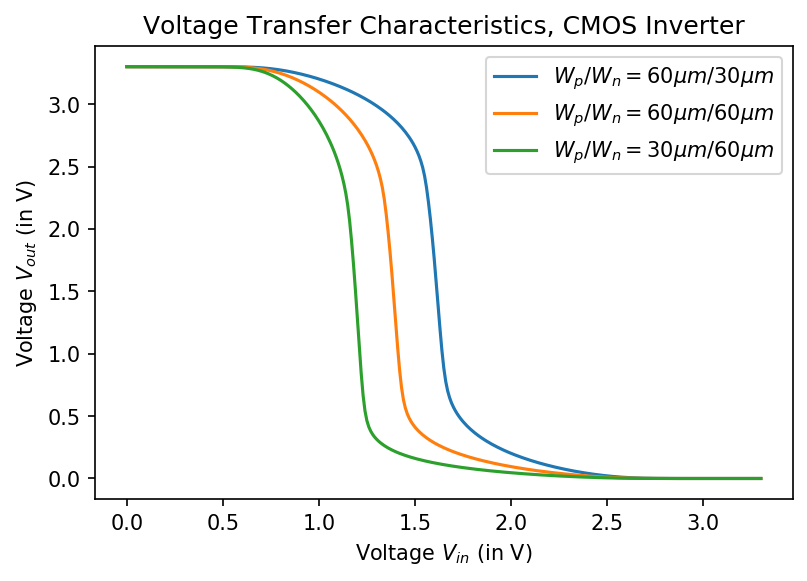

In [21]:
V_out = []
V_in = []

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{in}$ (in V)')
ax1.set_ylabel('Voltage $V_{out}$ (in V)')
ax1.set_title('Voltage Transfer Characteristics, CMOS Inverter')

for i in range(3):
    data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab6\\41' +  str(i+1) + '.txt', header = None, skipinitialspace=True, delim_whitespace=True)
    V_out.append(data[1])
    V_in.append(data[0])
    ax1.plot(V_in[i], V_out[i], '-o', markersize=0.01)
ax1.legend(["$W_p/W_n = 60\mu m/30\mu m$", "$W_p/W_n = 60\mu m/60\mu m$", "$W_p/W_n = 30\mu m /60\mu m$"])
fig1.set_dpi(150)
fig1.savefig('421.pdf')

In [22]:
for i in range(3):
    maxi = 0
    maxe = 1e5
    for j in range(len(V_in[i])):
        diff = abs(V_out[i][j] - V_in[i][j])
        if maxe > diff:
            maxe = diff
            maxi = j
    print(V_in[i][maxi], (V_out[i][maxi]))
    print("Switching Threshold =", (V_in[i][maxi]+ (V_out[i][maxi]))/2)

1.61 1.58237601
Switching Threshold = 1.5961880050000001
1.39 1.44592427
Switching Threshold = 1.4179621349999998
1.2 1.28932931
Switching Threshold = 1.244664655


In [23]:
for i in range(3):
    maxi = 0
    maxe = 0
    for j in range(len(V_in[i])-1):
        if V_out[i][j+1] != V_out[i][j]:
            slope = abs((V_out[i][j+1]-V_out[i][j])/(V_in[i][j+1]-V_in[i][j]))
            if (maxe < slope):
                maxe = slope
                maxi = j
    print(V_in[i][maxi], (V_out[i][maxi]))
    print("Switching Threshold =", (V_in[i][maxi]+ (V_out[i][maxi]))/2)

1.61 1.58237601
Switching Threshold = 1.5961880050000001
1.39 1.44592427
Switching Threshold = 1.4179621349999998
1.2 1.28932931
Switching Threshold = 1.244664655


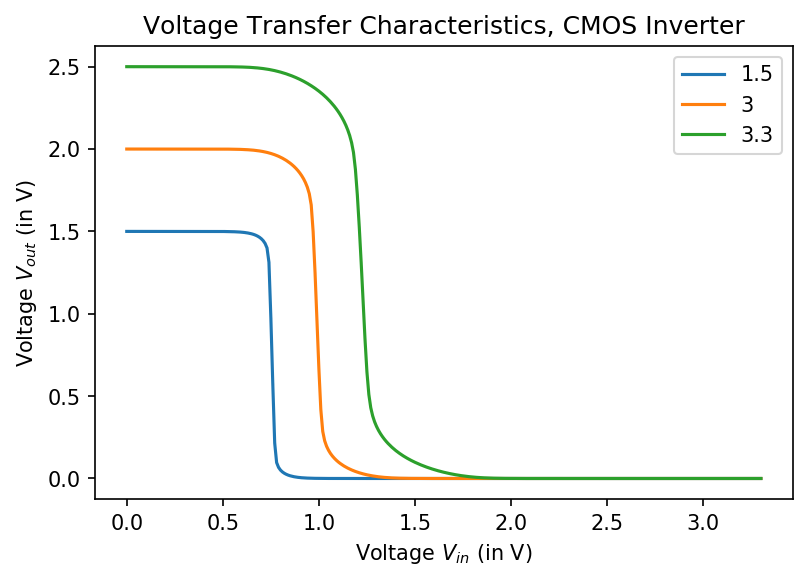

In [24]:
V_out = []
V_in = []
V_dd = [1.5, 3, 3.3]

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{in}$ (in V)')
ax1.set_ylabel('Voltage $V_{out}$ (in V)')
ax1.set_title('Voltage Transfer Characteristics, CMOS Inverter')

for i in range(3):
    data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab6\\42' +  str(i+1) + '.txt', header = None, skipinitialspace=True, delim_whitespace=True)
    V_out.append(data[1])
    V_in.append(data[0])
    ax1.plot(V_in[i], V_out[i], '-o', markersize=0.01)
ax1.legend(V_dd)
fig1.set_dpi(150)
fig1.savefig('422.pdf')

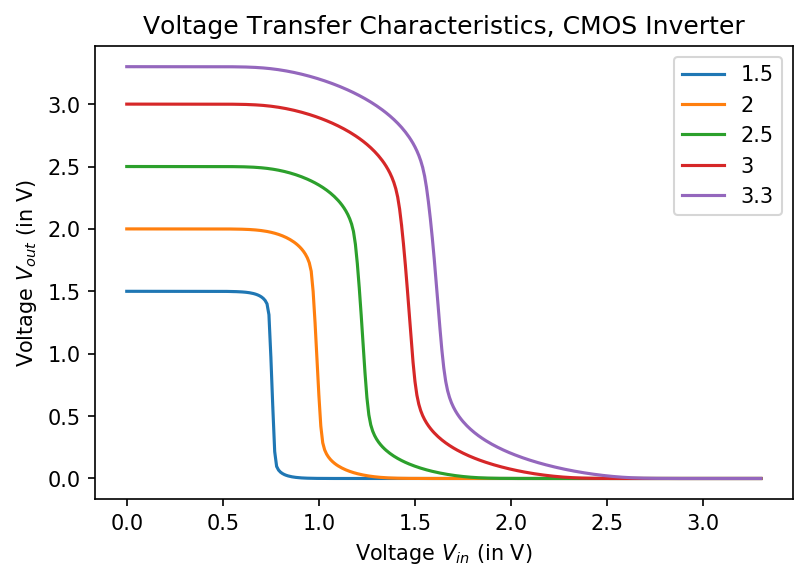

In [25]:
V_out = []
V_in = []
V_dd = [1.5, 2, 2.5, 3, 3.3]

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{in}$ (in V)')
ax1.set_ylabel('Voltage $V_{out}$ (in V)')
ax1.set_title('Voltage Transfer Characteristics, CMOS Inverter')

for i in range(5):
    data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab6\\42' +  str(i+1) + '.txt', header = None, skipinitialspace=True, delim_whitespace=True)
    V_out.append(data[1])
    V_in.append(data[0])
    ax1.plot(V_in[i], V_out[i], '-o', markersize=0.01)
ax1.legend(V_dd)
fig1.set_dpi(150)
fig1.savefig('422.pdf')

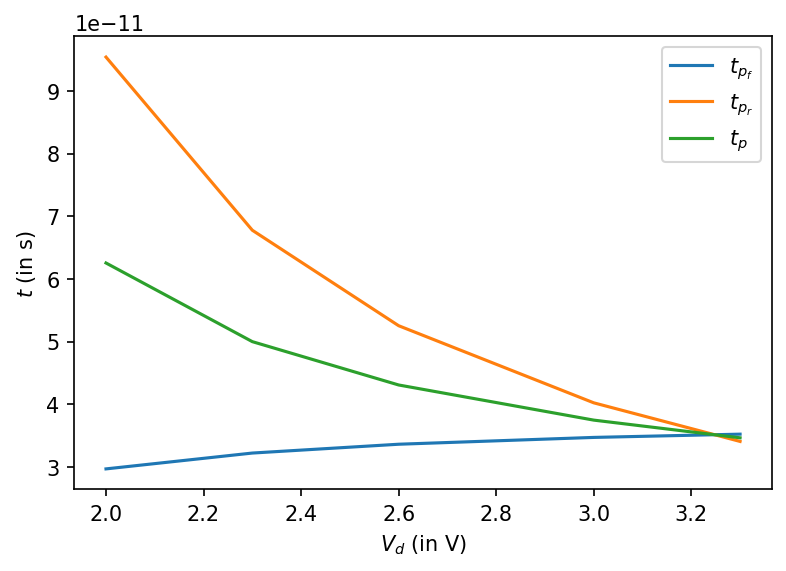

In [26]:
V_d = [2, 2.3, 2.6, 3, 3.3]
t_p_f = [2.969600e-11, 3.222300e-11, 3.363000e-11, 3.471800e-11, 3.523700e-11]
t_p_r = [9.539800e-11, 6.777200e-11, 5.253800e-11, 4.023600e-11, 3.407600e-11]
t_p = [6.254700e-11, 4.999750e-11, 4.308400e-11, 3.747700e-11, 3.465650e-11]
fig1, ax1 = plt.subplots()
ax1.plot(V_d, t_p_f)
ax1.plot(V_d, t_p_r)
ax1.plot(V_d, t_p)
ax1.set_xlabel("$V_d$ (in V)")
ax1.set_ylabel("$t$ (in s)")
ax1.legend(["$t_{p_f}$", "$t_{p_r}$", "$t_p$"])
fig1.set_dpi(150)
fig1.savefig('43.pdf')